<img width="10%" alt="Naas" src="https://landen.imgix.net/jtci2pxwjczr/assets/5ice39g4.png?w=160"/>

# Dask - Parallelize Operations on Multiple CSVs
<a href="https://app.naas.ai/user-redirect/naas/downloader?url=https://raw.githubusercontent.com/jupyter-naas/awesome-notebooks/master/D-Tale/Dask_parallelize_operations_on_multiple_csvs.ipynb" target="_parent"><img src="https://naasai-public.s3.eu-west-3.amazonaws.com/open_in_naas.svg"/></a>

**Tags:** #csv #pandas #snippet #read #dataframe #parallel #parallelize #dask #operations

**Author:** [Minura Punchihewa](https://www.linkedin.com/in/minurapunchihewa/)

## Input

### Imports

In [2]:
import os

### Import Graphviz (install if not present)

In [22]:
try:
    import graphviz
except:
    !pip install --user graphviz
    import graphviz

### Import Dask (install if not present)

In [23]:
try:
    import dask.dataframe as dd
except:
    !python -m pip install "dask[complete]"
    import dask.dataframe as dd

### Variable

In [24]:
folder_path = "nycflights"

%env FOLDER_PATH=$folder_path

env: FOLDER_PATH=nycflights


### Download dataset if it does not exists

In [25]:
%%bash

[[ -f "$FOLDER_PATH/nycflights.csv" ]] || (mkdir -p $FOLDER_PATH && wget -O $FOLDER_PATH/nycflights.csv  https://github.com/vaibhavwalvekar/NYC-Flights-2013-Dataset-Analysis/raw/master/flights.csv )

## Model

### Read the CSV files from path

In [26]:
# when the actual data types of given columns cannot be inferred from the first few examples
# they need to be specified manually
# this is where the dtype parameters comes in
df = dd.read_csv(os.path.join(folder_path, '*.csv'), 
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool,
                        'dep_delay': float})

## Output

### Calculate the max of a column

In [27]:
# no operation is actually performed until the .compute() function is called
df['dep_delay'].max().compute()

1301.0

### Visualize the parallel execution of the operation

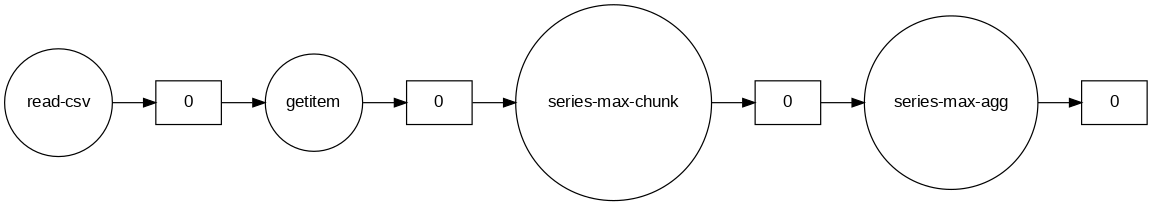

In [28]:
# the underlying task graph can be viewed to understand how the parallel execution takes place
df.dep_delay.max().visualize(rankdir="LR", size="12, 12!")

## Comparison

### Pandas

In [29]:
import pandas as pd
import glob

In [30]:
%%time
# the equivalent operation performed using Pandas
all_files = glob.glob(os.path.join(folder_path,'*.csv'))
dfs = []
for file in all_files:
    dfs.append(pd.read_csv(file, parse_dates={'Date': [0, 1, 2]}))
df = pd.concat(dfs, axis=0)
df.dep_delay.max()

CPU times: user 650 ms, sys: 31.8 ms, total: 682 ms
Wall time: 745 ms


1301.0

### Dask

In [31]:
%%time
# the entire operation again performed using Dask
df = dd.read_csv(os.path.join(folder_path,'*.csv'), 
                 parse_dates={'Date': [0, 1, 2]},
                 dtype={'TailNum': str,
                        'CRSElapsedTime': float,
                        'Cancelled': bool,
                       'dep_delay': float})
df['dep_delay'].max().compute()

# Dask clearly performs better in comparison to Pandas
# the performance benefits are more apparent when working on larger datasets
# especially when the size of the data exceeds available memory

CPU times: user 613 ms, sys: 76.2 ms, total: 690 ms
Wall time: 704 ms


1301.0